In [2]:
# 請先使用 transform.py 把原本的數據轉換得到 convert_shots.csv
# 接著要把不要的 feature 去掉
# 接下來再 clustering
# 最後統計出攻擊 cluster 和 防守 cluster 的數量比例

import pandas as pd
import sys

# load data
shots = pd.read_csv('convert_shot.csv')
# drop feature
features = ["shot_id", "rally_id", "shot_num", "player", "ball_type", 
            "player_A_x", "player_A_y", "player_B_x", "player_B_y",
            "player_C_x", "player_C_y", "player_D_x", "player_D_y"]
shots = shots[features]
print(shots.columns)

# extract positions in each team
shots_2side = pd.DataFrame()
rowlist = []

# iterate over each row in the shots dataframe
for _, row in shots.iterrows():
    # create a new row for team A
    new_row_A = {
        'player1_x': row['player_A_x'],
        'player1_y': row['player_A_y'],
        'player2_x': row['player_B_x'],
        'player2_y': row['player_B_y'],
        'shot_id': row['shot_id'],
        'rally_id': row['rally_id'],
        'shot_num': row['shot_num'],
        'player': row['player'],
        'ball_type': row['ball_type'],
        'team': 'A'
    }
    
    # adjust coordinates if player1_y is greater than 67
    # (meaning that it is on the other side of the court)
    if new_row_A['player1_y'] > 67:
        new_row_A["player1_x"] = 61 - new_row_A["player1_x"]
        new_row_A["player1_y"] = 134 - new_row_A["player1_y"]
        new_row_A["player2_x"] = 61 - new_row_A["player2_x"]
        new_row_A["player2_y"] = 134 - new_row_A["player2_y"]
    # drop the row if any of the coordinates are out of bounds
    if (new_row_A['player1_y'] < 0 or new_row_A['player2_y'] < 0 or 
        new_row_A['player1_x'] < 0 or new_row_A['player2_x'] < 0 or 
        new_row_A['player1_y'] > 134 or new_row_A['player2_y'] > 134 or
        new_row_A['player1_x'] > 61 or new_row_A['player2_x'] > 61):
        pass
    else:
        rowlist.append(new_row_A)
    
    # create a new row for team C
    new_row_C = {
        'player1_x': row['player_C_x'],
        'player1_y': row['player_C_y'],
        'player2_x': row['player_D_x'],
        'player2_y': row['player_D_y'],
        'shot_id': row['shot_id'],
        'rally_id': row['rally_id'],
        'shot_num': row['shot_num'],
        'player': row['player'],
        'ball_type': row['ball_type'],
        'team': 'C'
    }
    # adjust coordinates if player1_y is greater than 67 
    # (meaning that it is on the other side of the court)
    if new_row_C['player1_y'] > 67:
        new_row_C["player1_x"] = 61 - new_row_C["player1_x"]
        new_row_C["player1_y"] = 134 - new_row_C["player1_y"]
        new_row_C["player2_x"] = 61 - new_row_C["player2_x"]
        new_row_C["player2_y"] = 134 - new_row_C["player2_y"]
    # drop the row if any of the coordinates are out of bounds
    if (new_row_C['player1_y'] < 0 or new_row_C['player2_y'] < 0 or 
        new_row_C['player1_x'] < 0 or new_row_C['player2_x'] < 0 or 
        new_row_C['player1_y'] > 134 or new_row_C['player2_y'] > 134 or
        new_row_C['player1_x'] > 61 or new_row_C['player2_x'] > 61):
        pass
    else: 
        rowlist.append(new_row_C)
    
shots_2side = pd.DataFrame(rowlist)
print(shots_2side)



Index(['shot_id', 'rally_id', 'shot_num', 'player', 'ball_type', 'player_A_x',
       'player_A_y', 'player_B_x', 'player_B_y', 'player_C_x', 'player_C_y',
       'player_D_x', 'player_D_y'],
      dtype='object')
       player1_x  player1_y  player2_x  player2_y  shot_id  rally_id  \
0      32.360153  39.699208  29.248783  20.322900        1         1   
1      39.858757  42.907365  26.514130  27.074785        1         1   
2      26.998622  45.592380  28.219230  19.786440        2         1   
3      39.443274  50.419305  27.492354  28.198572        2         1   
4      24.309905  46.907710  24.174085  22.390977        3         1   
...          ...        ...        ...        ...      ...       ...   
63673  42.872356  22.545805  16.101164  22.496278    34027      2291   
63674  22.133909  37.562165  15.791648  17.400191    34028      2291   
63675  43.919972  24.470367  19.734170  25.378157    34028      2291   
63676  15.784349  31.432723  32.289911  23.347608    34029      22

c:\Users\vito\anaconda3\envs\for_sklearn\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


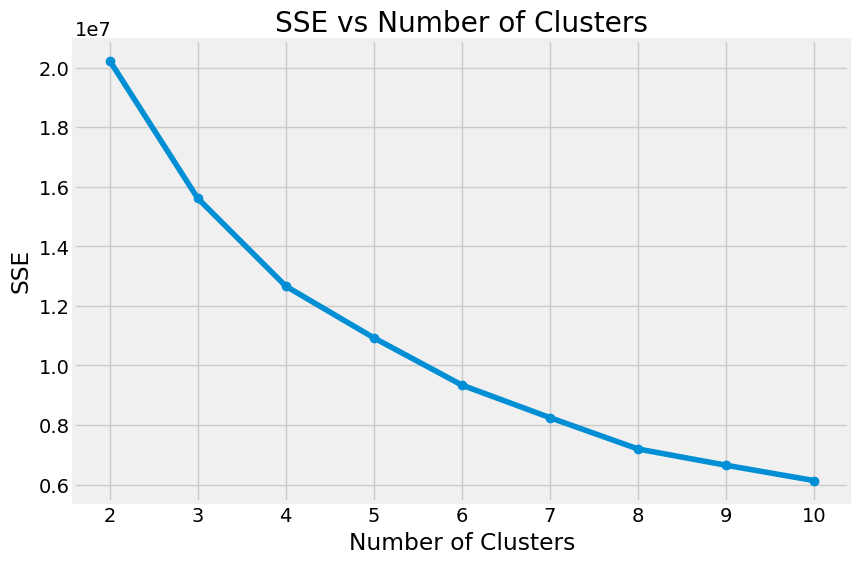

In [3]:
# using elbow method to find the optimal k
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Prepare data for clustering
X = shots_2side[['player1_x', 'player1_y', 'player2_x', 'player2_y']]

sse = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), sse, marker='o')
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("SSE vs Number of Clusters")
plt.show()

In [4]:
# # using silhouette score to find the optimal k
# from sklearn.metrics import silhouette_score

# silhouette_scores = []
# for k in range(2, 11):
#     kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
#     kmeans.fit(X)
#     lables = kmeans.labels_
#     score = silhouette_score(X, lables)
#     silhouette_scores.append(score)

# plt.plot(range(2, 11), silhouette_scores, marker='o')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Silhouette Score')
# plt.show()

cluster
3    12834
1    12752
2    10238
7     9017
0     5601
5     5086
6     4135
4     4015
Name: count, dtype: int64


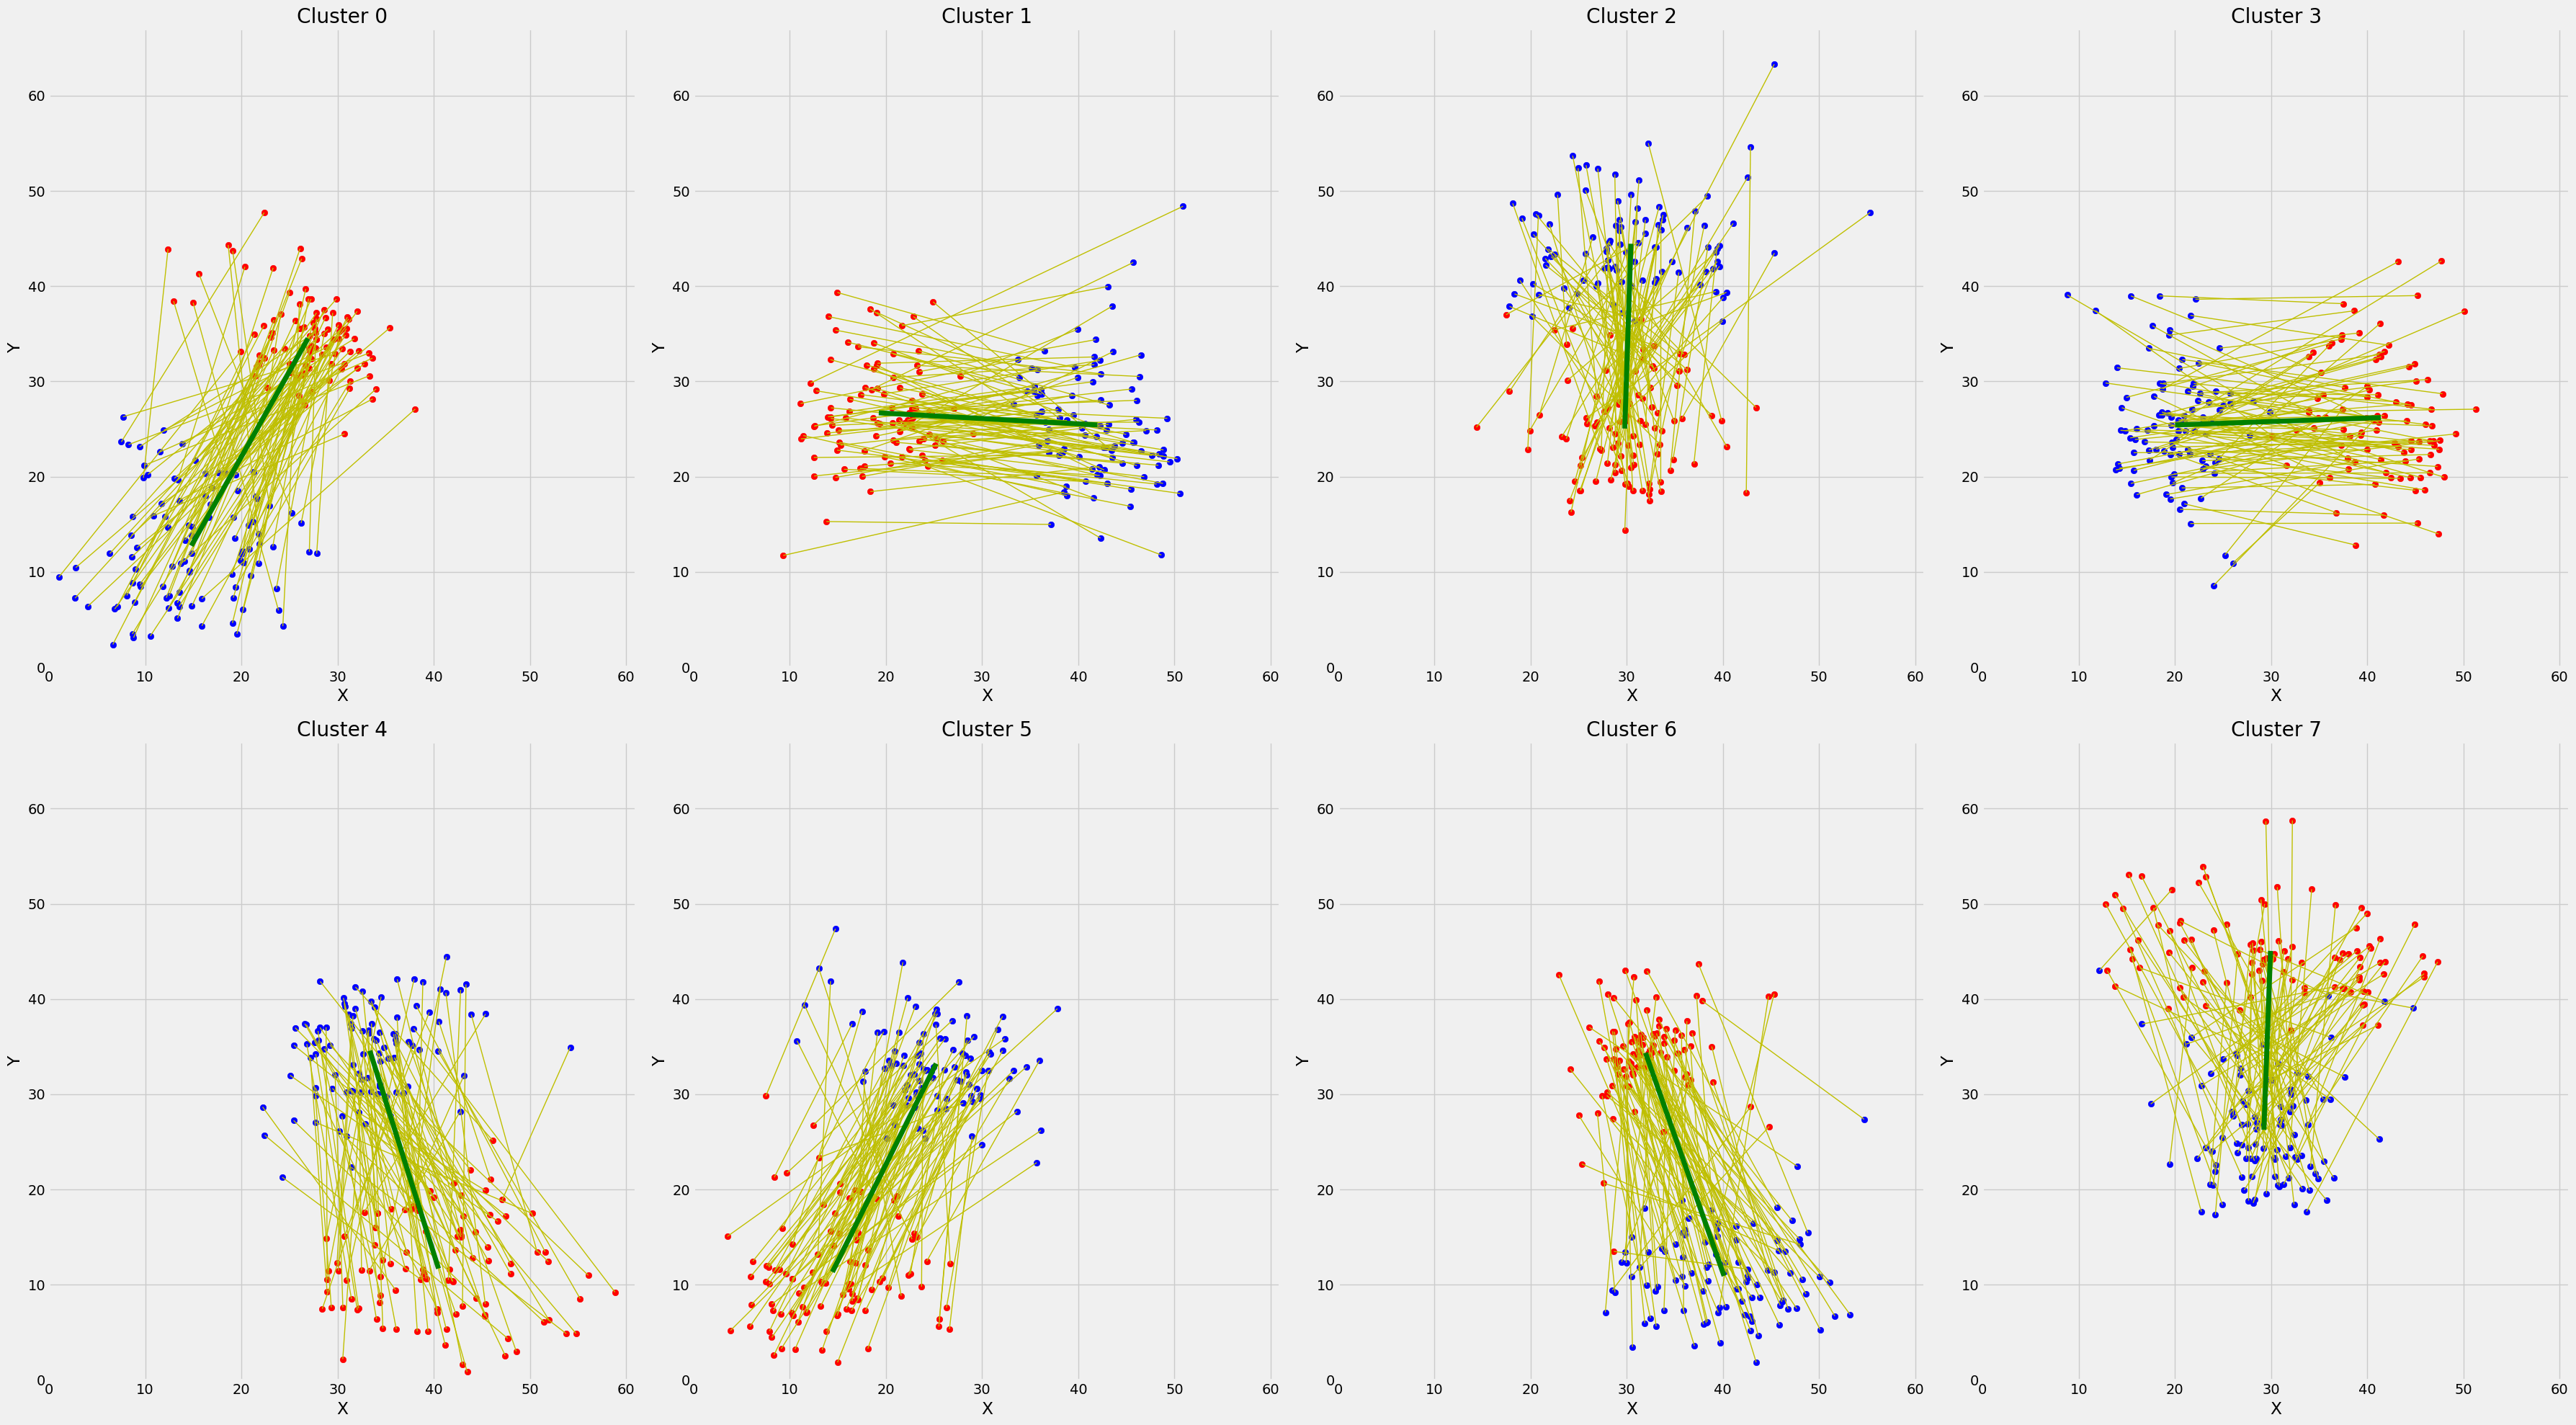

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Start clustering
n = 8  # Number of clusters
kmeans = KMeans(n_clusters=n, random_state=42, n_init=10)
kmeans.fit(X)
shots_2side['cluster'] = kmeans.fit_predict(X)
cluster_counts = shots_2side['cluster'].value_counts()
print(cluster_counts)

# Create a figure with 2x4 subplots
fig, axes = plt.subplots(2, 4, figsize=(36, 20))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten to make iteration easier

for cluster in range(0, n):
    ax = axes[cluster]  # Select the subplot axis
    cluster_data = shots_2side[shots_2side['cluster'] == cluster]
    # If more than 100 points, sample data
    if len(cluster_data) > 100:
        sample_data = cluster_data.sample(n=100, random_state=41)
    else:
        sample_data = cluster_data

    # Plot Player 1
    ax.scatter(sample_data['player1_x'], sample_data['player1_y'], color='r', label=f'Cluster {cluster} - Player 1')
    # Plot partner line
    ax.plot([sample_data['player1_x'], sample_data['player2_x']], 
             [sample_data['player1_y'], sample_data['player2_y']], color='y', label=f'Cluster {cluster} - partner line', linewidth=1)
    # Plot Player 2
    ax.scatter(sample_data['player2_x'], sample_data['player2_y'], color='b', label=f'Cluster {cluster} - Player 2')
    # Plot center line
    ax.plot([sample_data['player2_x'].mean(), sample_data['player1_x'].mean()],
            [sample_data['player2_y'].mean(), sample_data['player1_y'].mean()], 
            color='g', label=f'Cluster {cluster} - center line', linewidth=5)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_xlim(0, 61)
    ax.set_ylim(0, 67)
    ax.set_title(f'Cluster {cluster}')

    # # Save each subplot as an individual figure
    # individual_fig = plt.figure(figsize=(9.15, 10.05))
    # plt.scatter(sample_data['player1_x'], sample_data['player1_y'], color='r', label=f'Cluster {cluster} - Player 1')
    # plt.plot([sample_data['player1_x'], sample_data['player2_x']], 
    #          [sample_data['player1_y'], sample_data['player2_y']], color='y', label=f'Cluster {cluster} - partner line', linewidth=1)
    # plt.scatter(sample_data['player2_x'], sample_data['player2_y'], color='b', label=f'Cluster {cluster} - Player 2')
    # plt.plot([sample_data['player2_x'].mean(), sample_data['player1_x'].mean()],
    #          [sample_data['player2_y'].mean(), sample_data['player1_y'].mean()], 
    #          color='g', label=f'Cluster {cluster} - center line', linewidth=5)
    # plt.xlabel('X')
    # plt.ylabel('Y')
    # plt.xlim(0, 61)
    # plt.ylim(0, 67)
    # plt.title(f'Cluster {cluster}')
    # plt.savefig(f'cluster{cluster}.jpg')
    # plt.close(individual_fig)  # Close the individual figure after saving

# Adjust layout so the subplots don't overlap
plt.tight_layout()
# Save the entire figure
plt.savefig('all_clusters.jpg')
# Show the plot
plt.show()


In [ ]:
# statistics, to know which cluster is more likely to score
# first, put the cluster information back to the original dataframe
shots_pivot = shots_2side[["shot_id", "team", "cluster"]]
shots_pivot = shots_2side.pivot(index = 'shot_id', columns = 'team', values = 'cluster')
shots_pivot = shots_pivot.reset_index()
shots_pivot.columns = ["shot_id", "team_A_cluster", "team_C_cluster"]
shots_with_cluster = pd.merge(shots, shots_pivot, on = "shot_id", how = "left")
# get the last shot of each rally
last_shot = shots_with_cluster.groupby("rally_id").last().reset_index()

# then get the team information of each rally
rally = pd.read_csv('rally.csv')
rally = rally[["rally_id", "set_id", "serve_player", "score_team", "score_reason"]]
rally.drop(rally[rally["score_reason"] != "落地致勝"].index, inplace = True)
set = pd.read_csv('set.csv')
set = set[["set_id", "match_id"]]
match = pd.read_csv('match.csv')
match = match[["match_id", "win_A", "win_B", "lose_C", "lose_D"]]
rally = pd.merge(rally, set, on = "set_id", how = "inner")
rally = pd.merge(rally, match, on = "match_id", how = "inner")
# since the team information is not in the rally dataframe, we need to infer it from the serve player
current_set = -1
team0 = ""
team1 = ""
print(rally)
for index, row in rally.iterrows():
    # for each set, get which team is 0 and 1 (in the score_team column)
    if current_set != row["set_id"]:
        current_set = row["set_id"]
        if index+1 < len(rally):
            next_row = rally.iloc[index+1]
        else:
            print("error")
            sys.exit(1)
        if next_row["serve_player"] == row["win_A"] or next_row["serve_player"] == row["win_B"]:
            team0 = 'A' if row["score_team"] == 0 else 'C'
            team1 = 'C' if row["score_team"] == 0 else 'A'
        else:
            team0 = 'C' if row["score_team"] == 0 else 'A'
            team1 = 'A' if row["score_team"] == 0 else 'C'
    rally.at[index, "team0"] = team0
    rally.at[index, "team1"] = team1
# now we get which team is winning in each rally
# then we can get the cluster information of the winning team and losing team
shots_with_rally = pd.merge(last_shot, rally, on = "rally_id", how = "inner")
print(shots_with_rally)
def get_scoring_cluster(row):
    if row["score_team"] == 0: # team0 is the winning team
        return row["team_A_cluster"] if row["team0"] == 'A' else row["team_C_cluster"]
    else: # team1 is the winning team
        return row["team_A_cluster"] if row["team1"] == 'A' else row["team_C_cluster"]
def get_losing_cluster(row):
    if row["score_team"] == 0: # team0 is the winning team
        return row["team_C_cluster"] if row["team0"] == 'A' else row["team_A_cluster"] 
    else: # team1 is the winning team
        return row["team_C_cluster"] if row["team1"] == 'A' else row["team_A_cluster"] 
    
shots_with_rally["scoring_cluster"] = shots_with_rally.apply(get_scoring_cluster, axis = 1)
shots_with_rally["losing_cluster"] = shots_with_rally.apply(get_losing_cluster, axis = 1)

# finally, we can get the statistics
# Count the number of times each cluster scores
scoring_cluster_counts = shots_with_rally["scoring_cluster"].value_counts()
# Count the number of times each cluster loses
losing_cluster_counts = shots_with_rally["losing_cluster"].value_counts()
# Convert the scoring counts to a DataFrame
scoring_cluster_counts_df = scoring_cluster_counts.reset_index()
scoring_cluster_counts_df.columns = ["cluster", "scoring"]
# Convert the losing counts to a DataFrame
losing_cluster_counts_df = losing_cluster_counts.reset_index()
losing_cluster_counts_df.columns = ["cluster", "losing"]
# Get the total counts of each cluster
total_cluster_counts_df = shots_2side['cluster'].value_counts().reset_index()
total_cluster_counts_df.columns = ["cluster", "total"]
# Merge the scoring and losing counts DataFrames
cluster_counts_df = pd.merge(scoring_cluster_counts_df, losing_cluster_counts_df, on="cluster", how="outer")
# Merge the total counts DataFrame
cluster_counts_df = pd.merge(total_cluster_counts_df, cluster_counts_df, on="cluster", how="outer")

# Calculate the ratio of scoring to the sum of scoring and losing
cluster_counts_df["scoring/(scoring+losing)"] = cluster_counts_df["scoring"] / (cluster_counts_df["scoring"] + cluster_counts_df["losing"])
# Calculate the ratio of scoring to losing
cluster_counts_df["scoring/losing"] = cluster_counts_df["scoring"] / cluster_counts_df["losing"]
# Sort the DataFrame by the scoring/losing ratio in descending order
cluster_counts_df.sort_values(by="scoring/losing", ascending=False, inplace=True)
# Calculate the ratio of scoring to total
cluster_counts_df["scoring/total"] = cluster_counts_df["scoring"] / cluster_counts_df["total"]
# Calculate the ratio of losing to total
cluster_counts_df["losing/total"] = cluster_counts_df["losing"] / cluster_counts_df["total"]

# Print the DataFrame
print(cluster_counts_df[["cluster", "total", "scoring", "losing", "scoring/(scoring+losing)", "scoring/losing"]].to_string(index=False))
print("")
cluster_counts_df.sort_values(by="scoring/total", ascending=False, inplace=True)
print(cluster_counts_df[["cluster", "total", "scoring", "losing", "scoring/total"]].to_string(index=False))
print("")
cluster_counts_df.sort_values(by="losing/total", ascending=False, inplace=True)
print(cluster_counts_df[["cluster", "total", "scoring", "losing", "losing/total"]].to_string(index=False))
# Calculate and print the sum of scoring and losing
scoring = cluster_counts_df["scoring"].sum()
losing = cluster_counts_df["losing"].sum()
print(f"\nscoring sum: {scoring}")
print(f"losing sum: {losing}")

     rally_id  set_id  serve_player  score_team score_reason  match_id  win_A  \
0           2       1             8         1.0         落地致勝         2      5   
1           3       1             6         0.0         落地致勝         2      5   
2           4       1             7         1.0         落地致勝         2      5   
3           9       1             6         0.0         落地致勝         2      5   
4          10       1             7         0.0         落地致勝         2      5   
..        ...     ...           ...         ...          ...       ...    ...   
647      2246      66            23         0.0         落地致勝        29     14   
648      2264      67            14         1.0         落地致勝        29     14   
649      2271      67            14         1.0         落地致勝        29     14   
650      2281      67            14         1.0         落地致勝        29     14   
651      2290      67            14         0.0         落地致勝        29     14   

     win_B  lose_C  lose_D 